<a href="https://colab.research.google.com/github/MaicolLojano/Mineria-de-Datos/blob/main/UNIDAD2/Arboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRACTICA ÁRBOLES DE DECISIÓN**

**Nombre:** Maicol Lojano

**Ciclo:** M3A

**Asignatura:** Mineria de datos

Realizar el siguiente ejercicio sobre compras y explicar el modelo de acuerdo a los resultados obtenidos.

# Crear un DataFrame con Datos Ficticios:

In [ ]:
import pandas as pd
import numpy as np

# Generar datos ficticios
np.random.seed(0)

# Generar edades aleatorias entre 18 y 65 años
Edad = np.random.randint(18, 66, 1000)

# Generar ingresos aleatorios entre 1000 y 10000
Ingresos = np.random.uniform(1000, 10000, 1000)

# Generar compras aleatorias ('No' o 'Si')
Compra = np.random.choice(['No', 'Si'], 1000)

# Crear el DataFrame
data = {
    'Edad': Edad,
    'Ingresos': Ingresos,
    'Compra': Compra
}

df = pd.DataFrame(data)

In [ ]:
df.head()

,Edad,Ingresos,Compra
0,62,5317.784832,No
1,65,5575.513503,No
2,18,9705.333753,Si
3,21,1899.626640,Si
4,21,1356.854104,No


# Preprocesamiento de los Datos:

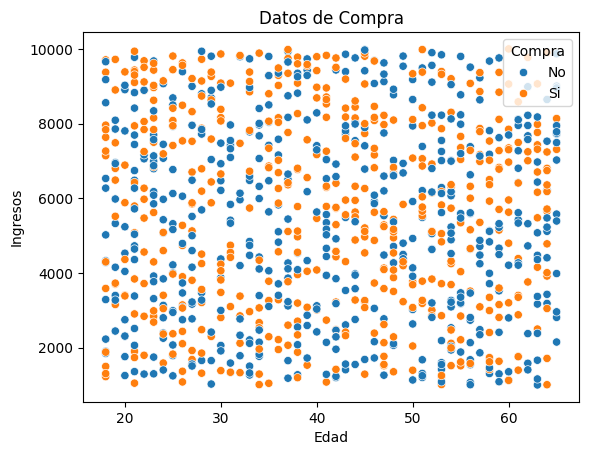

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Edad', y='Ingresos', hue='Compra', data=df)
plt.title('Datos de Compra')
plt.show()


In [ ]:
df.isnull().sum()

Edad        0
Ingresos    0
Compra      0
dtype: int64

In [ ]:
# Convertimos la columna 'Compra' a valores numéricos ('No' -> 0, 'Sí' -> 1)
df['Compra'] = df['Compra'].map({'No': 0, 'Si': 1})

In [ ]:
# 3. Definir las variables independientes (X) y la variable dependiente (y)
X = df[['Edad', 'Ingresos']]
y = df['Compra']

# Dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 5. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar el modelo

In [ ]:
# Crear el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier()

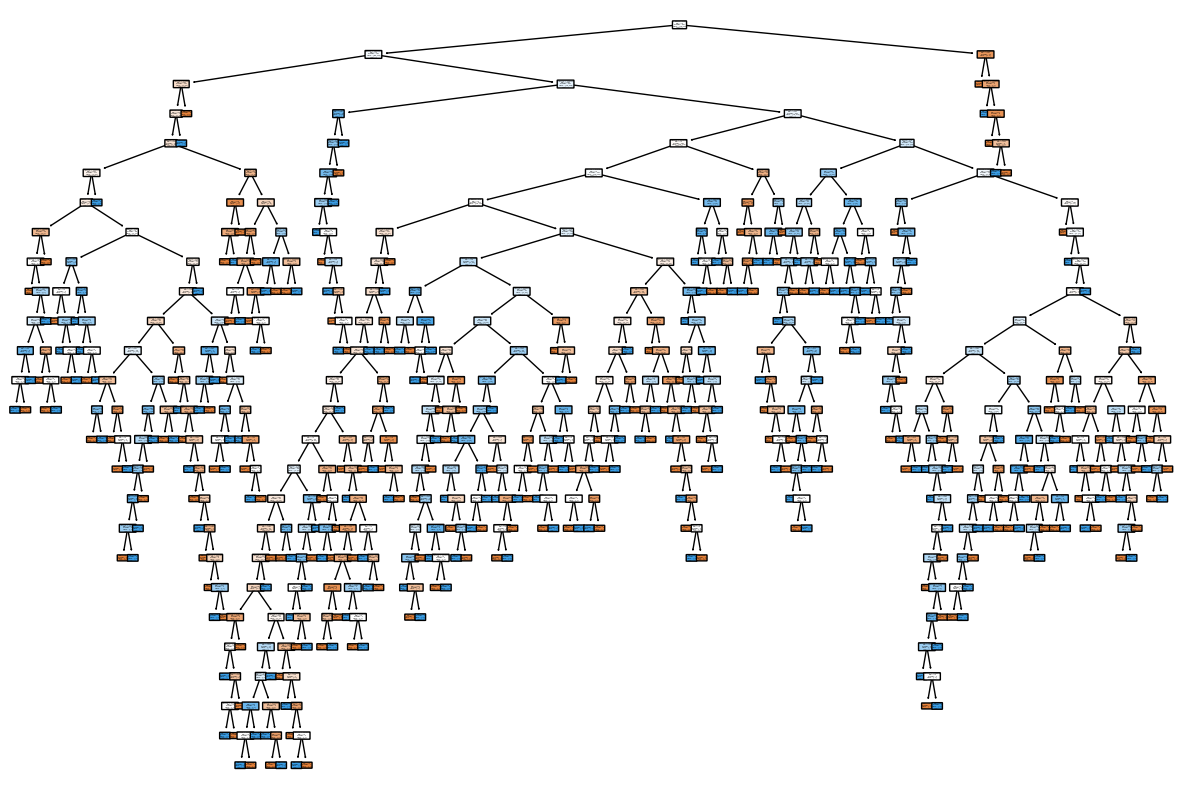

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Visualizar el árbol
plt.figure(figsize=(15, 10))
tree.plot_tree(modelo_arbol, feature_names=['Edad', 'Ingresos'], class_names=['No', 'Sí'], filled=True, rounded=True)
plt.show()


#Evaluar el modelo

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

#  Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
#Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Precisión:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Reporte de Clasificación:\n", class_report)

Exactitud: 0.535
Matriz de Confusión:
 [[51 58]
 [35 56]]
Precisión: 0.49122807017543857
Recall: 0.6153846153846154
F1 Score: 0.5463414634146342
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.59      0.47      0.52       109
           1       0.49      0.62      0.55        91

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.55      0.54      0.53       200



# Conclusion de la aplicacion del modelo

El modelo de árbol de decisión que se a aplicado, encontramos que el modelo no es muy preciso, acertando menos de la mitad del tiempo. Frecuentemente podemos decur que se equivoca al predecir quién comprará y quién no, lo que indica que necesitamos mejorar significativamente. El modelo a menudo predice erróneamente que una persona comprará cuando no lo hará, y viceversa. Para mejorar, sería útil recolectar más datos relevantes y considerar otros aplicar otros algoritmos de predicción. Aunque el modelo proporciona una idea inicial, no es lo suficientemente confiable para aplicaciones prácticas. Por ello, el modelo necesita ajustes y optimizaciones antes de poder utilizarse de manera efectiva para predecir comportamientos de compra.